# Support Vector Regression (SVR) on California Housing Dataset
This notebook demonstrates how to apply Support Vector Regression (SVR) using both linear and non-linear kernels on the California Housing dataset. The objective is to predict median house prices based on various socio-economic and geographic features.

## Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Step 2: Load and Explore the Dataset

In [2]:
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target
df = pd.concat([X, y.rename("Target")], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Step 3: Summary Statistics and Feature Overview

In [3]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


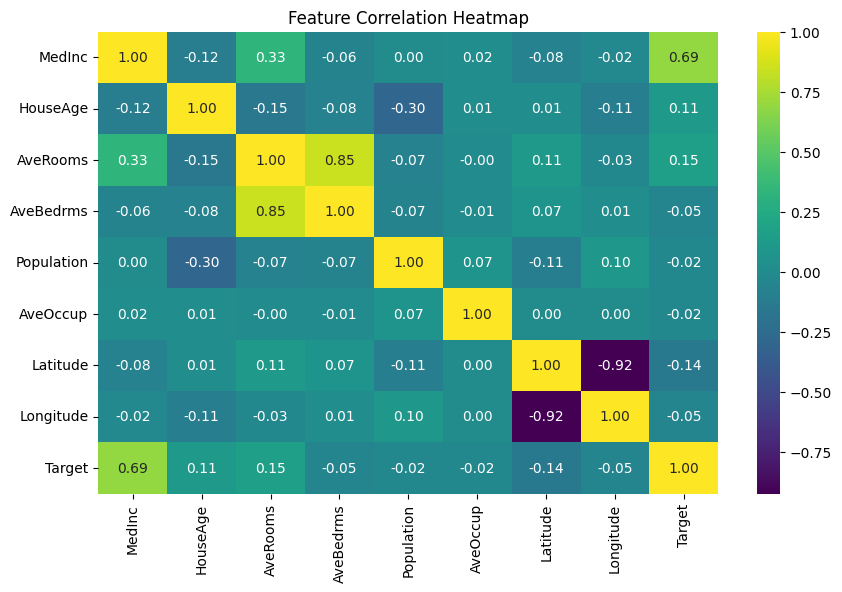

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='viridis')
plt.title("Feature Correlation Heatmap")
plt.show()

## Step 4: Data Preprocessing
Features are standardized using StandardScaler as SVR is sensitive to feature scaling.

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Step 5: Train SVR with Linear Kernel

In [6]:
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_linear.fit(X_train, y_train)
y_pred_linear = svr_linear.predict(X_test)

## Step 6: Evaluation - Linear SVR

In [7]:
print("Linear Kernel SVR Performance:")
print("R^2 Score:", r2_score(y_test, y_pred_linear))
print("MAE:", mean_absolute_error(y_test, y_pred_linear))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_linear)))

Linear Kernel SVR Performance:
R^2 Score: 0.5579620893457127
MAE: 0.511971619688797
RMSE: 0.7610850457368261


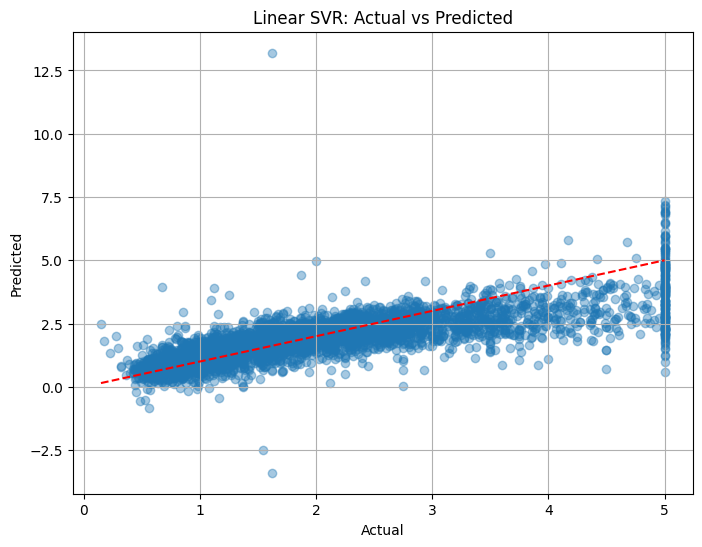

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear SVR: Actual vs Predicted")
plt.grid(True)
plt.show()

## Step 7: Train SVR with RBF Kernel

In [9]:
svr_rbf = SVR(kernel='rbf', C=10, epsilon=0.1)
svr_rbf.fit(X_train, y_train)
y_pred_rbf = svr_rbf.predict(X_test)

## Step 8: Evaluation - RBF SVR

In [10]:
print("RBF Kernel SVR Performance:")
print("R^2 Score:", r2_score(y_test, y_pred_rbf))
print("MAE:", mean_absolute_error(y_test, y_pred_rbf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rbf)))

RBF Kernel SVR Performance:
R^2 Score: 0.7544878407377742
MAE: 0.37616809426907954
RMSE: 0.567204846386674


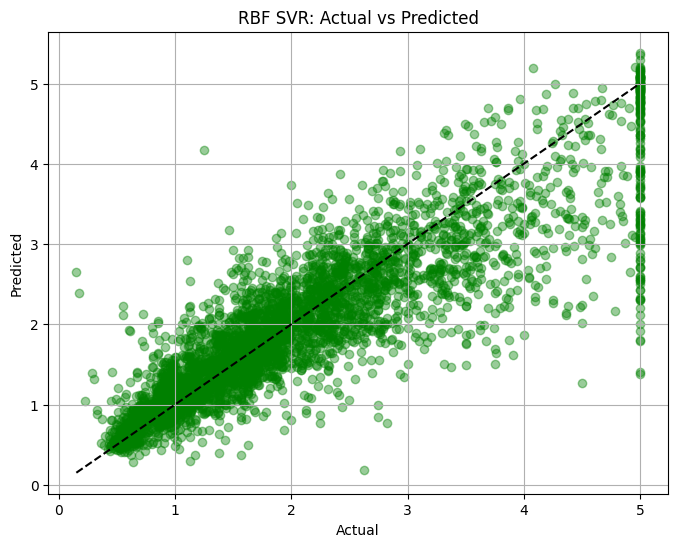

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rbf, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RBF SVR: Actual vs Predicted")
plt.grid(True)
plt.show()